In [240]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range

In [241]:
from matplotlib import pyplot as plt
%matplotlib inline

In [242]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [243]:
from scipy import stats
def gmm(X, n_classes, n_iter):
    # TODO fill in your code here
    
    #Initialize covariance matrix
    Pi = np.array([1./ n_classes] *  n_classes)
    mean = np.random.rand(n_classes, X.shape[1])
    
    cov = np.array([np.eye(X.shape[1])] * n_classes)


    for k in range(n_iter):
        print('K=', k)
        # E-step
        density = np.empty((X.shape[0], n_classes))
        for i in range(n_classes):
            density[:,i] = Pi[i] * stats.multivariate_normal.pdf(X, mean[i], cov[i], allow_singular=True)
        posterior = density / density.sum(axis=1).reshape(-1, 1)

        # M-step
        Pi_hat = posterior.sum(axis=0) / posterior.sum()
        print(Pi_hat)
        mean_hat = np.zeros((n_classes, X.shape[1]))
        cov_hat = []
        for i in range(n_classes):
            mean_hat[i] = np.average(X, axis=0, weights=posterior[:, i])
            cov_hat.append(np.cov(X - mean_hat[i], rowvar=0, aweights=posterior[:, i]))

        # Update
        cov = cov_hat
        mean = mean_hat
        Pi = Pi_hat

    class_assignments = np.argmax(posterior, axis=1)

    return class_assignments, mean, cov


In [244]:
class_assignments, mean, cov = gmm(X, 3, 50)  # You may want to tune the number of iterations

K= 0
[0.55472858 0.00735045 0.43792096]
K= 1
[0.55150468 0.0088533  0.43964203]
K= 2
[0.53894198 0.01359262 0.4474654 ]
K= 3
[0.51364276 0.02712012 0.45923712]
K= 4
[0.48427558 0.06345875 0.45226567]
K= 5
[0.45191944 0.14793347 0.40014709]
K= 6
[0.42724662 0.2596914  0.31306198]
K= 7
[0.4283919  0.29597903 0.27562907]
K= 8
[0.42735659 0.31456142 0.25808199]
K= 9
[0.42378278 0.32783972 0.24837751]
K= 10
[0.41297872 0.33326863 0.25375265]
K= 11
[0.40412683 0.3332614  0.26261176]
K= 12
[0.39747192 0.33324144 0.26928664]
K= 13
[0.39312903 0.33323179 0.27363918]
K= 14
[0.39179028 0.33322885 0.27498086]
K= 15
[0.39273311 0.33323217 0.27403472]
K= 16
[0.395127   0.33323762 0.27163538]
K= 17
[0.39846674 0.33324334 0.26828993]
K= 18
[0.40243935 0.33324898 0.26431166]
K= 19
[0.40679174 0.33325449 0.25995377]
K= 20
[0.41127492 0.33325972 0.25546537]
K= 21
[0.41565285 0.33326445 0.25108269]
K= 22
[0.41973673 0.33326848 0.24699479]
K= 23
[0.42339467 0.33327166 0.24333368]
K= 24
[0.42653269 0.333273

## Visualization: a Cross Section

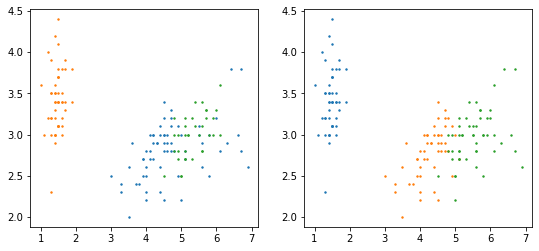

In [245]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection

In [246]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

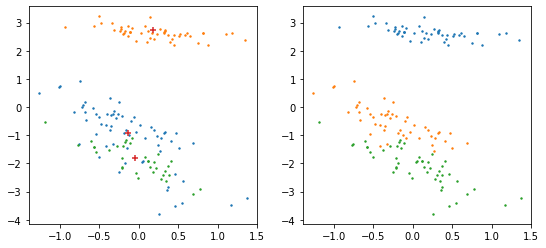

In [247]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)